<a href="https://colab.research.google.com/github/foxyto-coder/proyecto_integrado_2_schneider_melani/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# prompt: # prompt: armar una framework de al menos 100 filas con datos random con  apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Define materias escolares argentinas de nivel secundario
materias = [
    "Lengua y Literatura", "Matemática", "Historia", "Geografía", "Ciencias Naturales",
    "Ciencias Sociales", "Educación Física", "Inglés", "Educación Artística", "Música",
    "Tecnología", "Formación Ética y Ciudadana", "Biología", "Química", "Física"
]


# Función para generar datos aleatorios
def generar_datos(num_filas):
    apellidos = ["Perez", "Gonzalez", "Rodriguez", "Lopez", "Fernandez", "Martinez", "Garcia", "Sanchez", "Romero", "Torres"]
    nombres = ["Juan", "Maria", "Jose", "Ana", "Pedro", "Sofia", "Luis", "Laura", "Carlos", "Isabel"]

    datos = []
    for _ in range(num_filas):
        apellido = random.choice(apellidos)
        nombre = random.choice(nombres)
        dni = random.randint(10000000, 50000000)
        materia = random.choice(materias)
        nota1 = random.randint(1, 10)  # Notas del 1 al 10
        nota2 = random.randint(1, 10)
        nota3 = random.randint(1, 10)
        faltas = random.randint(0, 20)  # Faltas a clases

        datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])
    return datos

# Generar 100 filas de datos
datos_alumnos = generar_datos(100)

# Crear el DataFrame
columnas = ["Apellido", "Nombre", "DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"]
df_alumnos = pd.DataFrame(datos_alumnos, columns=columnas)

# Mostrar el DataFrame
df_alumnos

# Opcional: Guardar en un archivo CSV
#df_alumnos.to_csv("datos_alumnos.csv", index=False)

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Torres,Sofia,31662874,Inglés,6,2,10,17
1,Rodriguez,Ana,37591837,Tecnología,4,8,1,9
2,Gonzalez,Sofia,32322934,Formación Ética y Ciudadana,7,9,9,7
3,Perez,Jose,23204255,Tecnología,1,9,2,20
4,Sanchez,Ana,15417784,Física,6,2,3,15
...,...,...,...,...,...,...,...,...
95,Sanchez,Sofia,27418710,Ciencias Naturales,8,8,3,7
96,Garcia,Jose,36640608,Formación Ética y Ciudadana,8,8,1,11
97,Torres,Isabel,16539986,Matemática,4,9,9,9
98,Rodriguez,Maria,27802239,Inglés,6,3,7,3


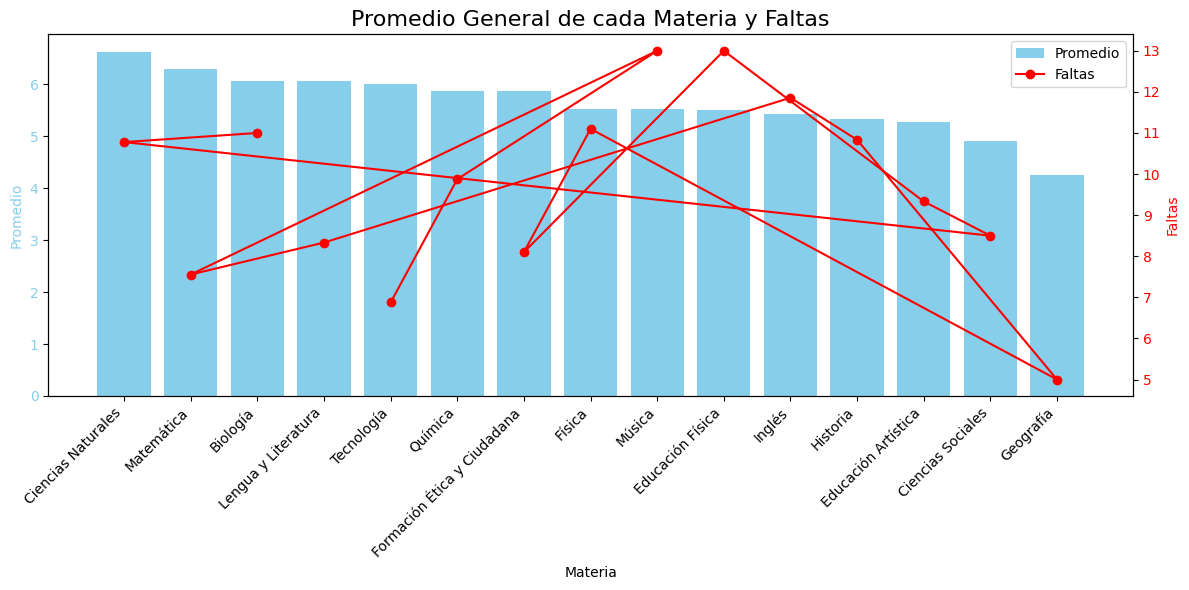

In [12]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
df_alumnos['Promedio'] = (df_alumnos['Nota 1er Trimestre'] + df_alumnos['Nota 2do Trimestre'] + df_alumnos['Nota 3er Trimestre']) / 3
promedios_por_materia = df_alumnos.groupby('Materia')['Promedio'].mean().sort_values(ascending=False)
faltas_por_materia = df_alumnos.groupby('Materia')['Faltas a clases'].mean()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(promedios_por_materia.index, promedios_por_materia.values, color='skyblue', label='Promedio')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada Materia y Faltas', fontsize=16)
plt.xticks(rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()